# Assignment 3 : Logistic Regression

In this assignment you have to use the logistic regression technique you learned in the week 3 of the prescribed course. You have to use numpy to complete the assignment

#### Import other the libraries here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
import seaborn as sn

##### Define these functions here:
- Sigmoid function: `def sigmoid(x):`

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost_fn(A,y):
    cost=-np.sum(y*np.log(A)+(1-y)*np.log(1-A))/5000
    return cost

- cost function: `def cost_fn(x,y,theta):` (refer to the course)

In [3]:
#I will take theta as column(401X10)(1st row is bias)
#X in input is 5000X400 make it 400X5000 || y is 10x5000|| final x is 401x5000
#I am avoiding broadcasting currently
def gradient_descent(X, y, theta,iters, learning_rate=1): #complete batch gradient descent may also use stochastic
    x=X.T
    x=np.vstack((np.ones((1,5000)),x))
    for i in range(iters):
        z=np.dot(theta.T,x)
        A=sigmoid(z)
        dz=sigmoid(z)-y #10x5000
        theta-=learning_rate*np.dot(x,dz.T)/50000
    return theta,cost_fn(A,y)    

- Gradient descent: `def gradient_descent(X, y, theta, learning_rate=1, iters):`

$\frac{\partial J}{\partial \theta} = \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})$

$\theta_{j+1}^{(i)} = \theta_j^{(i)} - \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})$

Since these are for each element of your matrix. The final expression will be: (if using matrices)
$\theta_{j+1} = \theta_j - \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x)-y)x_j)$

You have to initialise $\theta$ and update it at each iteration according to this gradient descent equation

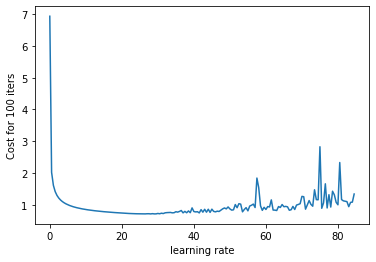

Value of Cost Function at end- 0.3627078940066033 and learning rate- 28.0


In [4]:
X=np.array(pd.read_csv("X.csv",header=None))
y=pd.read_csv("y.csv",header=None)
y_hot = np.array(pd.get_dummies(y[0])).T.astype(float)
theta=np.zeros((401,10))

#print(X.shape,y.shape,theta.shape,y_hot.shape)
costplt=[]
rateplt=[]

for i in range(170):
    theta_temp,cost=gradient_descent(X,y_hot,np.zeros((401,10)),100,i/2)
    costplt.append(cost)
    rateplt.append(i/2)
plt.plot(rateplt,costplt)
plt.xlabel("learning rate")
plt.ylabel("Cost for 100 iters")
plt.show()

learning_rate=rateplt[np.argmin(costplt)]
theta_final,cost_final=gradient_descent(X,y_hot,theta,10000,learning_rate)
print("Value of Cost Function at end-",cost_final,"and learning rate-",learning_rate)

- Predict: `def predict(X, y, theta, learning_rate=1, iters)`:

In [5]:
def predict(X, theta):
    x=X.T
    x=np.vstack((np.ones((1,5000)),x))
    z=np.dot(theta.T,x)
    A=sigmoid(z)
#A is 10x5000. we need row inder of max element in each column
    row_index = A.argmax(axis=0)
    return row_index
y=np.array(y[0]).reshape(1,5000)
y_pred=predict(X,theta_final).reshape(1,5000)
check=np.where(y_pred==y,1,0)
print("Accuracy= {}%".format(np.sum(check)/50))

Accuracy= 96.34%


### Load MNSIT data here

There are two file, X.csv and y.csv.
You have to load these csv files (read about csv in python) and store them in python variables. 
There are 5000 images, each line in X.csv is an image (pixels of image of size 20x20 are concatenated to size 400x1) and each line is y.csv is the label of that image (label in n-th line in y.csv corresponds to image in n-th line in X.csv)

label prediction
5     5
6     6
1     1
1     1
5     5
6     6


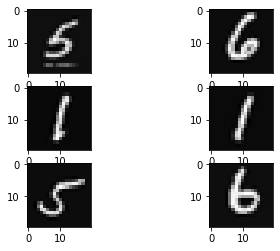

In [6]:
print("label","prediction")
for i in range (6):
    k=np.random.randint(0,5001)
    print(y[0][k],"   ", y_pred[0][k])
    digit=X[k]
    digit=digit.reshape(20,20)
    plt.subplot(3,2,i+1)
    plt.imshow(digit.T,cmap="gray") #image was laterally inverted so took T
plt.show()    

Now your task is to:
1. Reshape these to 20x20 and show any 5 of them (random) here. 
2. For regression, you have to use the 400x1 data only. (X will be a 5000x400 matrix and y will be a 1x5000 matrix)
3. Get you prediction and compare it with the labels in y
4. Calculate the error %

Generate the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) here and show it here: 


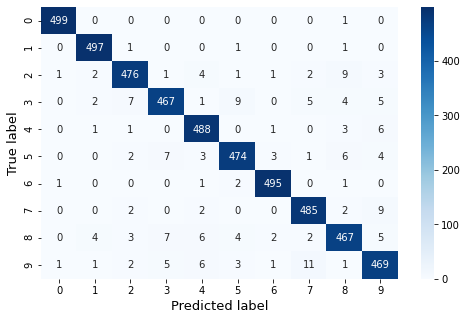

In [7]:
conf_mat=cm(y[0],y_pred[0]).astype(int)
plt.figure(figsize = (8,5))
sn.heatmap(conf_mat,annot=True,fmt='',cmap='Blues')
plt.xlabel("Predicted label", fontsize = 13);plt.ylabel("True label", fontsize = 13)
plt.show()
#sum all row is 100(so true value horizontal ans predicted vertical)

#### Bonus task: 
Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to perform logistic regression (just a single function which will handle all your task :P)

4719
Accuracy= 94.38%


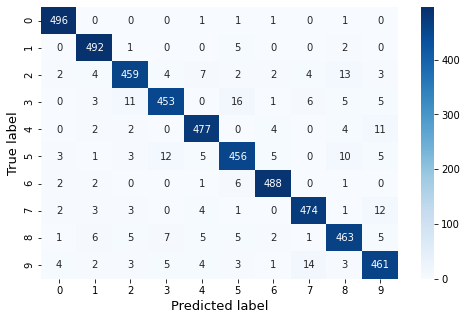

In [9]:
model = LogisticRegression(solver='liblinear').fit(X, y[0])
xx=np.arange(5000)
y_pred1 = model.predict(X)
#print(y[0].shape,y_pred1.shape,y_pred1,y)
arr=np.where(y_pred1==y,1,0)
print(np.sum(arr))
print("Accuracy= {}%".format(np.sum(arr)/50))
#print(model.intercept_.shape,model.coef_.shape,np.sum(arr))
plt.figure(figsize = (8,5))
conf_mat=cm(y[0],y_pred1)
sn.heatmap(conf_mat,annot=True,fmt='',cmap='Blues')
plt.xlabel("Predicted label", fontsize = 13);plt.ylabel("True label", fontsize = 13)
plt.show()

# Using tf.keras

In [10]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X,y[0],batch_size=30,epochs=7)
#2 dense layer of 300 and 100 neuron, lr=0.3, batch=30, epoch=7, accuracy=99+

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Epoch 1/7
167/167 [==============================] - 0s 1ms/step - loss: 1.0327 - accuracy: 0.6628
Epoch 2/7
167/167 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9190
Epoch 3/7
167/167 [==============================] - 0s 1ms/step - loss: 0.1425 - accuracy: 0.9569
Epoch 4/7
167/167 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9714
Epoch 5/7
167/167 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9722
Epoch 6/7
167/167 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9877
Epoch 7/7
167/167 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9892


Accuracy= 99.62%


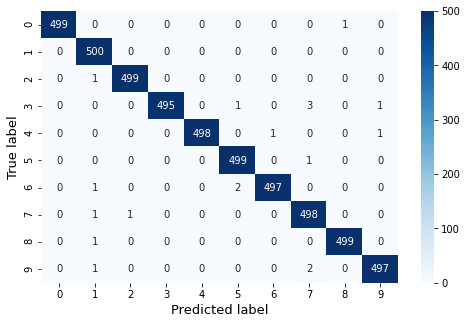

In [11]:
Y_pred=model.predict(X).argmax(axis=1)
conf_mat2=cm(y[0],Y_pred)
arr=np.where(Y_pred==y,1,0)
print("Accuracy= {}%".format(np.sum(arr)/50))
plt.figure(figsize = (8,5))
sn.heatmap(conf_mat2,annot=True,fmt='',cmap='Blues')
plt.xlabel("Predicted label", fontsize = 13);plt.ylabel("True label", fontsize = 13)
plt.show()